In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [7, 7]

In [3]:
df_train = pd.read_csv('ee-train.csv')
df_test = pd.read_csv('ee-test.csv')
df_test.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
2,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71
3,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68
4,0.86,588.0,294.0,147.00,7.0,4,0.0,0,19.34


In [4]:
df_train.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load'],
      dtype='object')

In [5]:
def normalize(df, mean_method = True ):
    if mean_method:
        # mean normalization
        normalized_df = (df - df.mean()) / df.std()
        a, b = df.std(), df.mean()
    else:
        # min max normalization
        normalized_df = (df - df.min()) / (df.max() - df.min())
        a, b = df.min(), df.max()
    return normalized_df, a, b

In [6]:
dm_train = df_train[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area','Overall Height', 'Heating Load']]
dm_test = df_test[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area','Overall Height', 'Heating Load']]

C:\Users\jdetu\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


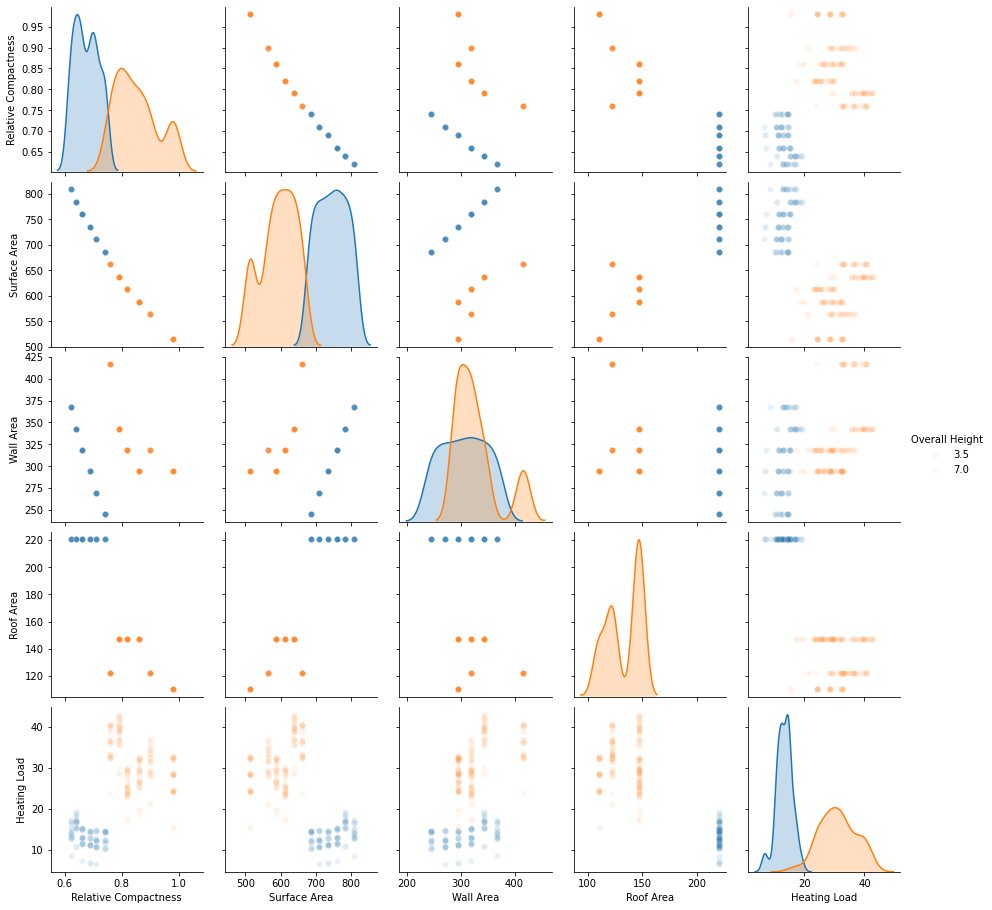

In [7]:
sns.pairplot(dm_train, corner = False ,plot_kws={'alpha':0.05}, hue = "Overall Height")

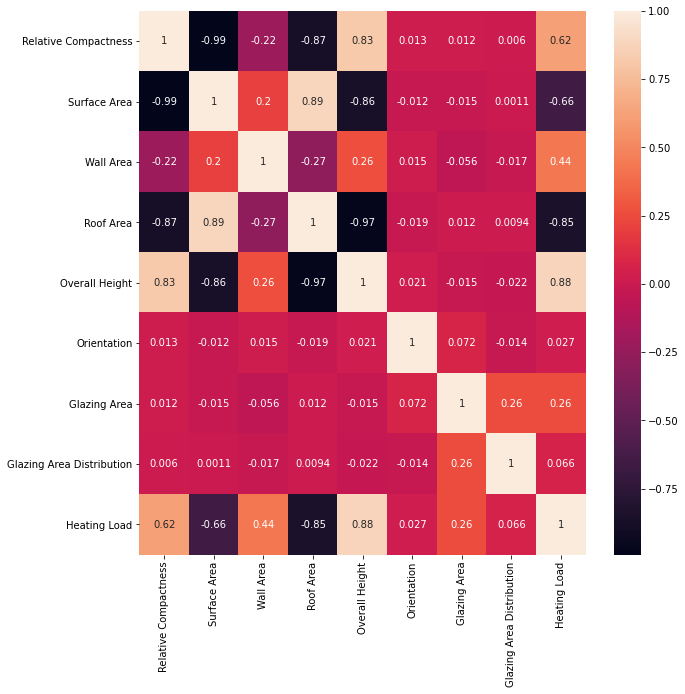

In [8]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(df_train.corr(), annot = True)

In [9]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as MSE

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [11]:
x_train, _, _ = normalize(x_train)
x_test, _, _ = normalize(x_test)

In [12]:
model = lr.fit(x_train,y_train)
model.score(x_train,y_train)

y_pred_train = lr.predict(x_train)

y_pred = lr.predict(x_test)

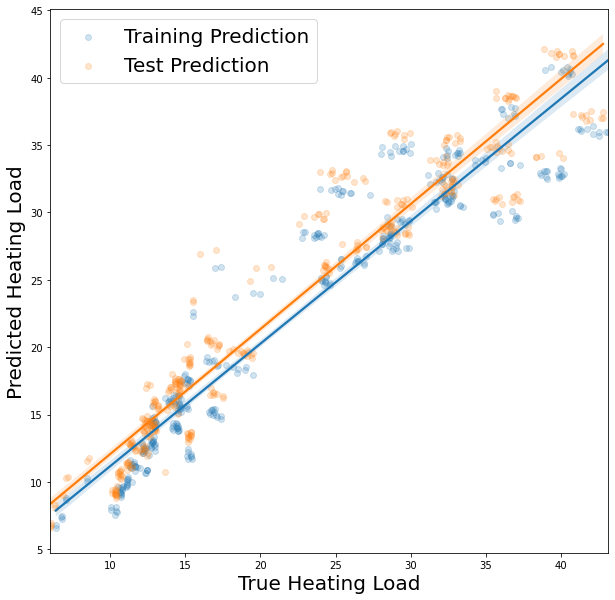

In [13]:
sns.regplot(y_train,y_pred_train, label = 'Training Prediction',scatter_kws={'alpha':0.2})
sns.regplot(y_test,y_pred, label = 'Test Prediction',scatter_kws={'alpha':0.2})

plt.xlabel('True Heating Load', size = 20)
plt.ylabel('Predicted Heating Load', size = 20)
plt.legend(fontsize = 20)

In [14]:
r2(y_train,y_pred_train), np.sqrt(MSE(y_train, y_pred_train))

(0.9102590385149811, 3.0115517876503612)

In [15]:
r2(y_test,y_pred), np.sqrt(MSE(y_test, y_pred))

(0.9056119431545255, 3.0958865845448544)